# Task 1

Write down the differential equation describing the system of chemical equations (assuming a volume of 1).

Using the simple technique described in the supplementary notes of the GRN lecture, we obtain the following ODEs:

d/dt[X] = 1 - 2.04[X] + 0.02([X]^2)[Y]

d/dt[Y] = 2[X] - 0.02([X]^2)[Y]

# Task 2

Use a package to solve the differential equation for 500 time units starting from X(0) = Y(0) = 0

The odeint package is used to solve the differential equations and then the results are plotted with matplotlib:

In [130]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [131]:
def solver(vals, t):
    [x,y] = vals
    dxdt = 1 - (2.04 * x) + (0.02 * (x ** 2) * y)
    dydt = (2 * x) - (0.02 * (x ** 2) * y)
    return [dxdt, dydt]

#initially X = 0 and Y = 0
init = [0,0]

#solve the differential equations for 500 time units
results = odeint(solver, init, range(500))

#pair the results with each of their timesteps
xvals = [(time, pair[0]) for time, pair in zip(range(500), results)]
yvals = [(time, pair[1]) for time, pair in zip(range(500), results)]

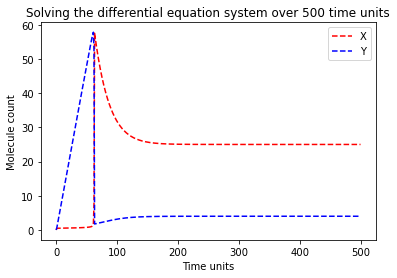

In [132]:
fig, ax = plt.subplots()
ax.plot(*zip(*xvals), "r--", label = "X")
ax.plot(*zip(*yvals), "b--", label = "Y")
ax.set_xlabel("Time units")
ax.set_ylabel("Molecule count")
ax.title.set_text("Solving the differential equation system over 500 time units")
ax.legend()

As would be expected by the ODEs, the Y population initially grows at a greater rate than X, until after around 60 time periods it rapidly decreases causing both X and Y to reach an equilibrium state where the X population size stays around 27 and the Y population size stays around 3.

# Task 3

Write a Gillespie algorithm to simulate the same four chemical equations and plot the results for 500 time units

In [122]:
def run_gillespie():

    #initially both 0 again
    x_amt = 0
    y_amt = 0

    #Model the chemical equations described
    def eq1():
        nonlocal x_amt
        x_amt += 1

    def eq2():
        nonlocal x_amt
        nonlocal y_amt
        x_amt -= 1
        y_amt += 1

    def eq3():
        nonlocal x_amt
        nonlocal y_amt
        x_amt += 1
        y_amt -= 1

    def eq4():
        nonlocal x_amt
        x_amt -= 1

    equations = [eq1, eq2, eq3, eq4]

    #Put the data in numpy arrays for convenience of element-wise multiplication
    equation_rates = np.array([1, 2, 0.02, 0.04])

    #Calculate the lhs values using the technique from the GRN lecture
    #supplementary notes, make it a callable so that it uses the 
    #current values for x and y amounts
    lhs = lambda: np.array([1, x_amt, (x_amt ** 2) * y_amt, x_amt])

    def calc_weights():
        weights = equation_rates * lhs()
        total = sum(weights)
        return [weight/total for weight in weights]

    sum_weights = lambda: sum(equation_rates * lhs())

    #timestamps paired with population data that will be plotted
    x_data = []
    y_data = []

    t = 0.0
    T = 500.0

    while t < T:

        #log of a random value between 0.0 and 1.0 as determined
        #by the algorithm
        dt = (-np.log(np.random.uniform())) / sum_weights()

        #choose the next most likely equation determined by the rates
        #timesed by current amounts, then "run" the chemical equation
        np.random.choice(equations, p = calc_weights())()

        #keep track of the x and y populations at each timestep
        x_data.append((t,x_amt))
        y_data.append((t,y_amt))

        t += dt
    
    return (x_data, y_data)

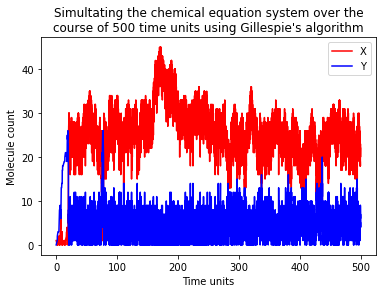

In [127]:
def plot_gillespie(x_data, y_data):
    fig, ax = plt.subplots()
    ax.plot(*zip(*x_data), "r", label = "X")
    ax.plot(*zip(*y_data), "b", label = "Y")
    ax.set_xlabel("Time units")
    ax.set_ylabel("Molecule count")
    ax.title.set_text("Simultating the chemical equation system over the\ncourse of 500 time units using Gillespie's algorithm")
    ax.legend()

x_data, y_data = run_gillespie()
plot_gillespie(x_data, y_data)

Although the graph does not show the same clear, smooth lines shown by our solutions from the ODE solver, we can recognise the same trends namely the Y population initially growing much faster than X and then immediately decreasing to a smaller amount, followed by X and Y remaining in this "equilibrium" state with the Y population staying smaller than the X population. The equilibrium state is clearer for the Y molecules than the X molecules, however this is to be expected due to the fact the general X population stays larger so any slight fluctuations are much more apparent in the data.